# Проект E-commerce — Анализ товарного ассортимента
    
   Предоставлены данные о продажах интернет-магазина товаров для дома 
    
  Задача :

- Проанализировать ассортимент товаров.
- Выявление основного и дополнительного ассортимента товаров 
- Формулировка и проверка статистических гипотез



  ## Описание данных

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Набор данных включает следующие поля: :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

##  Изучение общей информации о данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools
import calendar
import warnings

In [2]:
# открываем файл
df = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv') 

In [3]:
# общая информация  и первые 10 строк таблицы:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [4]:
# подсчет пропусков
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [5]:
# проверим на дубликаты
df.duplicated().sum()

0

In [6]:
# Чтобы часть столбцов в дальнейшем не скрывалась, настроим принудительное отображение
pd.set_option('display.max_colwidth', None)

##  Предобработка данных 

In [7]:
# замена данных в колонке с датой  с числового типа на строку
df['date'] = df['date'].astype('str')
df['date'] 

0       2018100100
1       2018100100
2       2018100100
3       2018100100
4       2018100100
           ...    
6732    2019103111
6733    2019103112
6734    2019103113
6735    2019103114
6736    2019103116
Name: date, Length: 6737, dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
display(df['date'])

0      2018-10-01 00:00:00
1      2018-10-01 00:00:00
2      2018-10-01 00:00:00
3      2018-10-01 00:00:00
4      2018-10-01 00:00:00
               ...        
6732   2019-10-31 11:00:00
6733   2019-10-31 12:00:00
6734   2019-10-31 13:00:00
6735   2019-10-31 14:00:00
6736   2019-10-31 16:00:00
Name: date, Length: 6737, dtype: datetime64[ns]

Изучена первая информация о данных:

Дубликатов в данных не выявлено .

Пропусков нет.

Названия столбцов таблицы Гипотезы  не соответствуют принятым, необходима замена прописных букв на строчные . 

Даты в таблицах в неверном формате и требуют перевода в формат даты  

In [9]:
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


## Исследовательский анализ данных

### Изучение распределения значений данных  в столбцах , работа с аномалиями

Анализируем информацию по столбцам 

0       1
1       1
2       1
3       1
4       1
       ..
6732    1
6733    1
6734    1
6735    1
6736    1
Name: quantity, Length: 6737, dtype: int64

,quantity
count,6737.000000
mean,2.501559
std,15.266478
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1000.000000


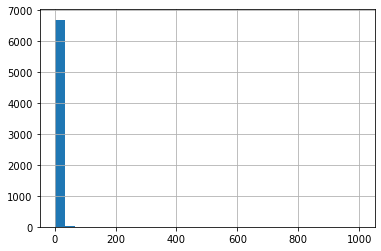

In [10]:
 # изучение колличества товаров в заказах
df['quantity'].value_counts()
display(df['quantity'])
df['quantity'].hist(bins=30)
df[['quantity']].describe() 

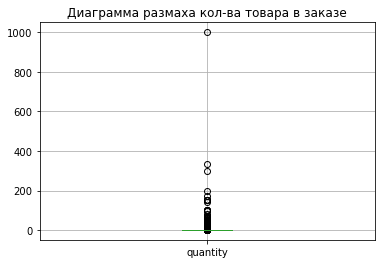

In [11]:
df[['quantity']].boxplot()
plt.title('Диаграмма размаха кол-ва товара в заказе')
plt.show()

In [12]:
display('Перцентили по колличеству товара в заказе',np.percentile(df['quantity'], [95, 97, 99]))


'Перцентили по колличеству товара в заказе'

array([ 6.  , 10.  , 26.64])

В среднем на пользователя приходится 2.5 заказа в 75% случаев на пользователя оформляется один заказ. По распределению персентелей , все что более 27 будет выбросами

Посмотрим на заказ из 1000 товаров

In [13]:
df[df['quantity']==1000].sort_values(by = 'quantity')

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0


In [14]:
df[df['quantity']>=27].sort_values(by = 'quantity')

,date,customer_id,order_id,product,quantity,price
693,2018-11-07 19:00:00,6ae61023-9d87-4ff3-a02e-b42eab150140,68908,Коврик придверный Attribute NATURE кокосовый 60x40 см AMC015,27,286.0
1518,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755.0
1895,2019-02-18 15:00:00,61f60726-5362-44d0-a0ae-800730389f32,70327,Эхинокактус Грузони d-5 см,29,74.0
1369,2018-12-26 10:00:00,ea741fdc-4883-4fc1-a34e-a8bcf8dc6cbb,69608,"Тарелка суповая Luminarc ОКЕАН ЭКЛИПС 20,5 см L5079",30,82.0
4037,2019-05-27 10:00:00,b92e90cd-7904-463b-ab38-7f8c8830f777,71519,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",30,51.0
...,...,...,...,...,...,...
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0


Возможно заказы с большим кол-вом позиций оптовые,  их немного 68 шт.,поскольку магазин ориентирован на розничные продажи эти данные могут быть удалены , как аномальные

,quantity
count,6669.000000
mean,1.695157
std,2.521689
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,26.000000


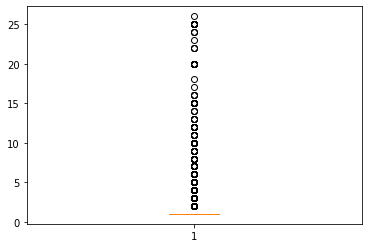

In [15]:
# удаление аномалий и проверка 
df = df.loc[df['quantity']<27]

plt.boxplot(x=df['quantity'])
df[['quantity']].describe() 

0        142.0
1        194.0
2        112.0
3        179.0
4        112.0
         ...  
6732     404.0
6733    1087.0
6734     157.0
6735     397.0
6736    1087.0
Name: price, Length: 6669, dtype: float64

,price
count,6669.000000
mean,465.645824
std,874.670175
min,9.000000
25%,105.000000
50%,135.000000
75%,412.000000
max,14917.000000


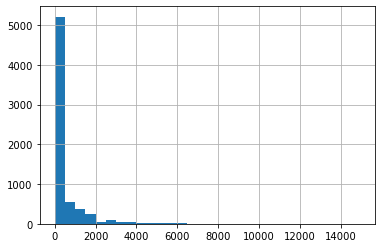

In [16]:
 # изучение цены товаров 
df['price'].value_counts()
display(df['price'])
df['price'].hist(bins=30)
df[['price']].describe() 

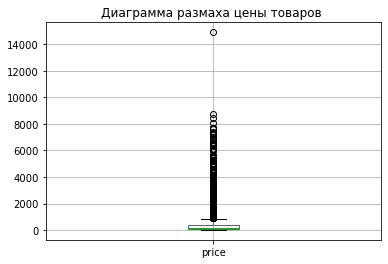

In [17]:
df[['price']].boxplot()
plt.title('Диаграмма размаха цены товаров ')
plt.show()

In [18]:
display('Перцентили по цене товара ',np.percentile(df['price'], [95, 97, 99]))

'Перцентили по цене товара '

array([1949.  , 2774.  , 4286.16])

In [19]:
df[df['price'] >= 14000].sort_values(by = 'price')

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0


In [20]:
df[df['price'] >= 4226].sort_values(by = 'price')

,date,customer_id,order_id,product,quantity,price
6373,2019-09-21 18:00:00,c23c92a7-c8d8-46b4-8511-8efdf90d6a55,72713,"Сумка-тележка хозяйственная Rolser Jet Bora N Joy черная, JET007 negro JOY",1,4274.0
4126,2019-05-29 23:00:00,43cfa2f6-fa81-4965-b502-20a5247bd250,71550,Полки QWERTY Мадрид белый/чёрный 50х30х12 см 2 штуки и 30х24х12 см 2 штуки 72019,1,4312.0
1622,2019-01-28 18:00:00,35a6aae3-9710-443c-b360-2cc3c6e2eef6,70007,"Штора для ванной Spirella / Спирелла TEX Shine текстиль с гидрофобной пропиткой, шампань, 180*200 см, 1015640",1,4424.0
1621,2019-01-28 17:00:00,35a6aae3-9710-443c-b360-2cc3c6e2eef6,70007,"Штора для ванной Spirella / Спирелла TEX Shine текстиль с гидрофобной пропиткой, шампань, 180*200 см, 1015640",1,4424.0
1440,2019-01-05 19:00:00,ca032543-8163-4497-a877-1a12aca3c121,69709,Стремянка FRAMAR MAJOR TECH 4 алюминиевая 4-х ступенчатая 4126,1,4499.0
...,...,...,...,...,...,...
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 см алюминиевая с лотком для инструментов,1,7724.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",1,8437.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",1,8737.0


Дорогих заказов мало , думаю , что удалять их не стоит. Если только удалить  уличную сушилку у нас ведь товары для дома )) 

,price
count,6668.000000
mean,463.478554
std,856.640700
min,9.000000
25%,105.000000
50%,135.000000
75%,412.000000
max,8737.000000


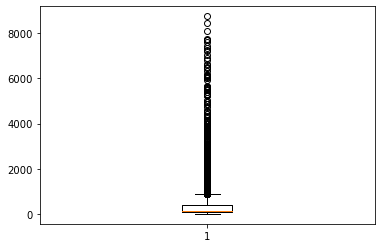

In [21]:
# удаление аномалий и проверка 
df = df.loc[df['price']<= 14000]

plt.boxplot(x=df['price'])
df[['price']].describe() 

In [22]:
# общая оценка  значений столбца 
df['order_id'].value_counts()  

14833    888
14835    203
14753     90
14897     63
70960     60
        ... 
70314      1
70319      1
70321      1
70320      1
73164      1
Name: order_id, Length: 2731, dtype: int64

In [23]:
df[df['order_id']== 14833].sort_values(by = 'date')

,date,customer_id,order_id,product,quantity,price
4157,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
4168,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,1,210.0
4167,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0
4166,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0
4164,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0
...,...,...,...,...,...,...
5534,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0
5533,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0
5543,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0
5537,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0


In [24]:
# общая оценка  значений столбца
df['customer_id'].value_counts() 

1d6c8c1f-a799-4418-9af2-1ded47d7a85c    888
db77c238-3c80-4032-9e3c-c30a43f4a650    203
c971fb21-d54c-4134-938f-16b62ee86d3b    143
3d5fef90-4a65-4a7e-84cf-010eba7b038d     90
42d3cb27-6519-4627-9b4a-5aa8ee600203     63
                                       ... 
8d79f722-c1e6-4804-999b-a06c3fbf9c77      1
ce3dcc71-6bb0-45fe-bf2e-86110def785f      1
97f42c35-cee4-4a2a-8819-165574d2a17b      1
a479e857-7300-43d4-833c-55dc5bb65c83      1
25df96a7-c453-4708-9cea-a3dfc7c342ea      1
Name: customer_id, Length: 2402, dtype: int64

В данных обнаружены неявные дубликаты в столбцах наименование товара, идентификатор заказа и идентификатор покупателя. Данные совпадают лишь есть разница во времени заказа. 


In [25]:
#посмотрим на дубликаты
duplicates= df[df[['customer_id', 'order_id', 'product']].duplicated(keep = False)]
duplicates

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарным покрытием 12 см, LG17085",1,239.0
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытием MARBLE ALPENKOK d = 26 см AK-0039A/26N,1,824.0
17,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см AK-26GL,1,262.0
18,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
...,...,...,...,...,...,...
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6717,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


In [26]:
#посмотрим дубликаты все, кроме первых строк
dublicates_f= df[df[['customer_id', 'order_id', 'product']].duplicated(keep = 'first')] 
dublicates_f

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


In [27]:
# удалим дубликаты 
df_new=df.drop_duplicates (subset=['customer_id', 'order_id','product'])

In [28]:
df_new

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0


В данных обнаружено много неявных дубликатов и для корректного анализа они были удалены. Менеджменту магазина стоит обратить внимание на корректность внесения данных .  

### добавление столбцов

#### выручка
#### месяц с годом
#### день недели
#### час совершения заказа

### Временной анализ
 

#### анализ нагрузки на магазин по часам (определение времени  максимальной  покупательской активности  )
#### анализ продаж по дням недели

In [29]:
# добавим новый столбец c  выручкой 
df_new['revenue'] = df_new['price']*df_new['quantity']

C:\Users\popov\AppData\Local\Temp\ipykernel_20476\3685301879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['revenue'] = df_new['price']*df_new['quantity']


In [30]:
df_new.sort_values( by='quantity',ascending=False)

,date,customer_id,order_id,product,quantity,price,revenue
3400,2019-05-05 08:00:00,c8ae456d-90aa-4498-8457-0d2015202f8a,71351,Цветок искусственный Гвоздика пластиковая одиночная в ассортименте 50 см,26,20.0,520.0
2618,2019-04-02 12:00:00,749cef81-0af4-4620-b880-6a728df5dfe8,70976,Гвоздика стандартная Новия 70 см Колумбия Плантация Turflor S.A.S 25 штук в упаковке,25,37.0,925.0
174,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,Муляж Яблоко зеленый 9 см полиуретан,25,51.0,1275.0
6692,2019-10-25 13:00:00,14cc96d3-7d14-4e84-9c15-76e57b642c72,73092,Цветок искусственный Нарцисс одиночный в ассортименте 35 см,25,20.0,500.0
164,2018-10-09 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68585,"Крючок одежный тройной латунь (Б-47), 1110182",25,57.0,1425.0
...,...,...,...,...,...,...,...
2093,2019-03-01 13:00:00,1ad78811-b8b9-4607-9e9b-9b105927534e,14554,Пеларгония розебудная Prins Nikolai укорененный черенок,1,135.0,135.0
2095,2019-03-01 13:00:00,1ad78811-b8b9-4607-9e9b-9b105927534e,14554,Пеларгония розебудная Red Pandora укорененный черенок,1,135.0,135.0
2096,2019-03-01 13:00:00,1ad78811-b8b9-4607-9e9b-9b105927534e,14554,Пеларгония Toscana Angeleyes Amarillo Burgundy укорененный черенок,1,112.0,112.0
2097,2019-03-01 13:00:00,1ad78811-b8b9-4607-9e9b-9b105927534e,14554,Пеларгония Toscana Angeleyes Bicolor укорененный черенок,1,112.0,112.0


In [31]:
df_new[['revenue']].describe()

,revenue
count,4790.000000
mean,646.077662
std,1168.425238
min,9.000000
25%,120.000000
50%,188.000000
75%,715.000000
max,24370.000000


значения выручки  от 9.0(min)до 24370(max), в стреднем составляет  чуть более 646р., причем 50% показывают лишь 188, что говорит о преимущественной продаже более дешевых товаров  

При добавлении столбца с месяцем заказа нужно добавить еще и год , т.к. месяцы повторяются

In [32]:
# добавим новый столбец c годом и месяцем 

df_new['month_year'] = df_new['date'].dt.to_period('M')
display(df_new.head(10))

C:\Users\popov\AppData\Local\Temp\ipykernel_20476\1475823119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month_year'] = df_new['date'].dt.to_period('M')


,date,customer_id,order_id,product,quantity,price,revenue,month_year
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0,2018-10
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,2018-10
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,2018-10
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,269.0,2018-10
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,674.0,2018-10


In [33]:
revenue_by_month=df_new.pivot_table(index='month_year',values='revenue',aggfunc='sum').reset_index()
revenue_by_month.sort_values( by='revenue', ascending=False)

,month_year,revenue
0,2018-10,325002.0
2,2018-12,308058.0
1,2018-11,305448.0
6,2019-04,296545.0
4,2019-02,296130.0
5,2019-03,245022.0
9,2019-07,220015.0
7,2019-05,215745.0
12,2019-10,193887.0
8,2019-06,177258.0


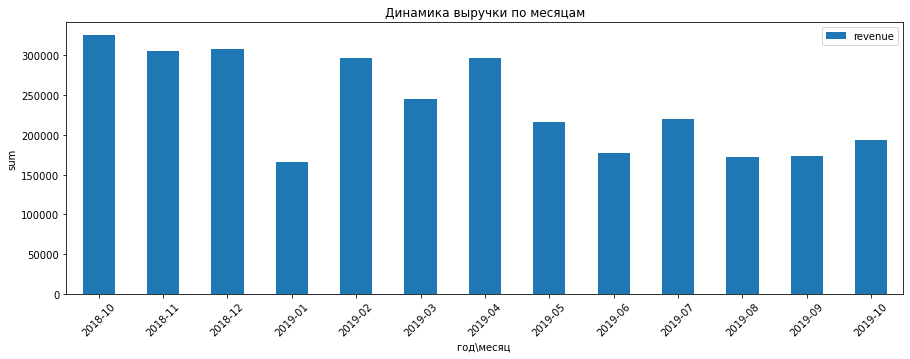

In [34]:
revenue_by_month.plot(x='month_year', y= 'revenue', kind='bar', figsize=(15,5), title='Динамика выручки по месяцам')
plt.ylabel('sum')
plt.xlabel('год\месяц ')
plt.xticks(rotation = '45')
plt.show()

-Наибольшая выручка продемонстрирована в первый работы магазина в октябре 2018 (составила 325002)

-резкий  спад выручки в январе  2019 до 166237

-затем в феврале  и апреле 2019 увеличение продаж (колеблется около 296545)

-Далее ежемесячная выручка колебалась спад в  июне ( до 177258)несколько восстановился в июле(до 220015), но с августа вновь  снижение

-Некоторое улучшение показателей  наблюдается в  октябре 2019 


 -Ежемесячная выручка уменьшается, причем последние полгода её значение составляет около 60% выручки первого месяца исследуемого периода.



In [35]:
# добавление столбца с днем недели
df_new['day_of_week'] = df['date'].dt.weekday
df_new['day_of_week'].value_counts()

C:\Users\popov\AppData\Local\Temp\ipykernel_20476\816875728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['day_of_week'] = df['date'].dt.weekday


0    839
1    793
3    771
2    707
4    624
6    585
5    471
Name: day_of_week, dtype: int64

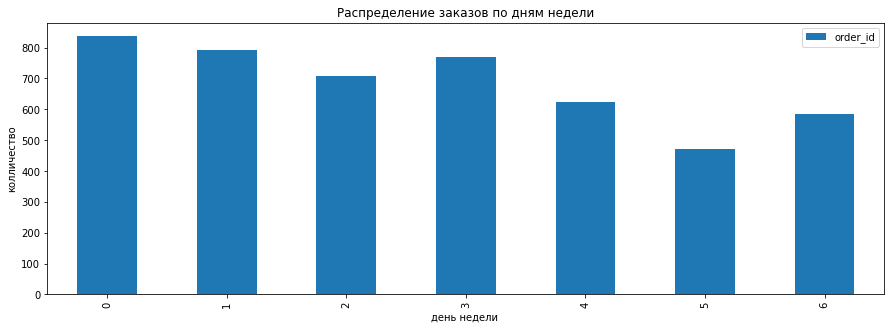

In [36]:
# сводная таблица распределения количества заказов по дням недели
df_new_week = df_new.pivot_table(index='day_of_week', values='order_id',aggfunc='count').reset_index()
df_new_week.plot(x='day_of_week', y= 'order_id', kind='bar', figsize=(15,5), title='Распределение заказов по дням недели')
plt.ylabel('колличество')
plt.xlabel('день недели ')
plt.show()


Наибольшее кол-во заказов в начале недели до среды . Спад  заказов в пятницу -субботу традиционно связан с активным досугом вне дома))

In [37]:
# добавление столбца с часом продаж
df_new['time_of_day'] = df_new['date'].dt.hour
df_new['time_of_day'].value_counts()

C:\Users\popov\AppData\Local\Temp\ipykernel_20476\2578185263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['time_of_day'] = df_new['date'].dt.hour


13    423
11    385
14    377
12    350
16    341
10    329
9     316
15    299
17    294
19    259
8     237
21    234
22    234
20    195
18    161
7      81
23     73
0      50
1      41
5      35
6      28
4      25
2      16
3       7
Name: time_of_day, dtype: int64

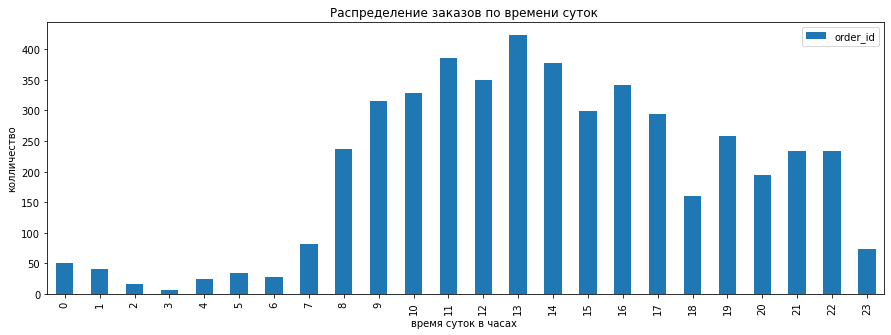

In [38]:
# сводная таблица распределения количества заказов по времени суток
df_new_hour = df_new.pivot_table(index='time_of_day', values='order_id',aggfunc='count').reset_index()
df_new_hour.plot(x='time_of_day', y= 'order_id', kind='bar', figsize=(15,5), title='Распределение заказов по времени суток ')
plt.ylabel('колличество')
plt.xlabel('время суток в часах ')

plt.show()

Время  максимальной  покупательской активности середина дня  с 11 до 17 часов
Возвращение покупательского интереса с 19  до 22 часов 
Это время стоит учитывать при планировании рекламных акций и рассылок

### Определение категорий товаров по кол-ву продаж и по выручке
#### Добавление столбца с категорией товара

Посмотрим на товары распределенные по числу продаж и полученной выручке

In [39]:
#Cводная таблица товаров по кол-ву продаж и выручке
product_df = df_new.pivot_table(index='product', values=['order_id','revenue','price','quantity'], 
                    aggfunc={'order_id':'count',
                             'revenue': 'sum', 
                             'price': 'mean', 
                             'quantity':'count',
                             }).round().sort_values(by = 'revenue', ascending = False)

product_df.columns = ['Кол-во заказов','Средняя цена','Кол-во товаров','Выручка']


product_df

,Кол-во заказов,Средняя цена,Кол-во товаров,Выручка
product,,,,
Сумка-тележка 2-х колесная Gimi Argo синяя,47,1072.0,47,50405.0
"Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90",5,5609.0,5,28045.0
"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см, сталь",1,4874.0,1,24370.0
"Веник сорго с деревянной ручкой с 4-мя швами, Rozenbal, R206204",2,540.0,2,20010.0
Сумка-тележка 3-х колесная Gimi Tris Floral синяя,7,2699.0,7,18893.0
...,...,...,...,...
Петрушка Итальянский гигант 2 г 4660010776553,1,10.0,1,10.0
Морковь Детская сладость 2 г 4660010775921,1,10.0,1,10.0
"Незабудка смесь 0,1 г 4650091480340",1,10.0,1,10.0


In [40]:
df_new['product'].value_counts()

Пеларгония розебудная Red Pandora укорененный черенок                                                                 66
Пеларгония розебудная Prins Nikolai укорененный черенок                                                               57
Пеларгония зональная диам. 12 см сиреневый полумахровый                                                               52
Сумка-тележка 2-х колесная Gimi Argo синяя                                                                            47
Пеларгония розебудная Mary укорененный черенок                                                                        39
                                                                                                                      ..
Штора для ванной Spirella / Спирелла TEX Shine текстиль с гидрофобной пропиткой, шампань, 180*200 см, 1015640          1
Роза Патио оранжевая d-12 см h-30                                                                                      1
Штора для ванной Spirella / Спир

In [41]:
# функция для разделения значений в колонке товаров по пробелу и 
#формирование нового столбца  c первыми словами из наименований товара для дальнейшего формирования категорий
def columns_split(cell):
    first_word =cell.split(' ')[0]
    return first_word

df_new['first_word'] =df_new['product'].apply(columns_split) 
display(df_new['first_word'])

C:\Users\popov\AppData\Local\Temp\ipykernel_20476\296182074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['first_word'] =df_new['product'].apply(columns_split)


0             Комнатное
1             Комнатное
2           Радермахера
3       Хризолидокарпус
4               Циперус
             ...       
6731             Мимоза
6732                Таз
6733      Сумка-тележка
6734             Герань
6735                Таз
Name: first_word, Length: 4790, dtype: object

In [42]:
# сгруппируем и посмотрим 50 наиболее часто встречающихся 
grouped_first_word = df_new.groupby('first_word',as_index=False).agg({'quantity':'count'})\
.sort_values(by='quantity', ascending=False)
grouped_first_word.head(50) 


,first_word,quantity
259,Пеларгония,708
303,Рассада,467
363,Сушилка,276
362,Сумка-тележка,235
213,Муляж,162
455,томата,142
266,Петуния,141
77,Гладильная,118
70,Герань,110
139,Коврик,105


In [43]:
df_new['first_word'].unique()

array(['Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус',
       'Шеффлера', 'Юкка', 'Настенная', 'Таз', 'Чехол', 'Вешалка',
       'Сушилка', 'Корзина', 'Мини-сковорода', 'Сковорода', 'Стеклянная',
       'Доска', 'Сумка-тележка', 'Многолетнее', 'Рассада', 'Муляж',
       'Щетка-сметка', 'Сумка', 'Тарелка', 'Вилка', 'Ложка', 'Нож',
       'Герань', 'Ерш', 'Пеларгония', 'Котел', 'Суккулент', 'Эхеверия',
       'Набор', 'Коврик', 'Подкладка', 'Дозатор', 'Ёрш', 'Эвкалипт',
       'Цветок', 'Мусорный', 'Плед', 'Скатерть', 'Кувшин', 'Адиантум',
       'Ковер', 'Перчатки', 'Стремянка', 'Гладильная',
       'Лестница-стремянка', 'Толкушка', 'Тележка', 'Готовая',
       'Искусственный', 'Простыня', 'Чайник', 'Штора', 'Банка', 'Крючок',
       'Комплект', 'Стяжка', 'Кампанула', 'Декоративная', 'Противень',
       'Калатея', 'Нолина', 'Плечики', 'Подушка', 'Полотенце',
       'Хлорофитум', 'Цикламен', 'Глоксиния', 'Азалия', 'Гортензия',
       'Хризантема', 'Салфетка', 'Вкладыши', 'Миксе

Распределим полученные первые слова наименований товаров по категориям.  Выделены  следующие категории : 

  - растения
 
  - товары для дома и декор
 
  - товары для кухни
 
  - хозяйственные товары
 
  - текстиль
 
  - Стремянки
 
  - инструменты
 
  - сумки-тележки
 
   - другое
   
 Отдельно выделила категорию другое( товары по первым словам которых трудно определить категорию)


In [44]:
# Cоздадим словарь с категориями и списками  уникальных слов 

category_dictionary = {
    'растения':['Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус','Шеффлера', 'Юкка','Многолетнее', 
                'Рассада','Пеларгония', 'Суккулент', 'Эхеверия','Эвкалипт','Адиантум','Цветок','Кампанула',
                'Калатея', 'Нолина','Хлорофитум', 'Цикламен', 'Глоксиния', 'Азалия', 'Гортензия',
       'Хризантема','Мирт','Цветущее','Кориандр','Иссоп', 'Сантолина', 'Аспарагус', 'Антуриум',
       'Молодило', 'Фиалка', 'Гербера', 'Душица', 'Мелисса', 'Роза','Бегония', 'Розмарин',
       'Афеляндра','Бальзамин','Альбука','Крассула', 'Артемизия', 'Лаванда', 'Мята', 'Каланхое',
       'Примула', 'Дендробиум', 'Калоцефалус', 'Каллуна', 'Капсикум', 'Мимоза', 'Соланум', 'Дендробиум', 'Калоцефалус',
        'Мимоза', 'Соланум', 'Бархатцы','Алиссум','Скиммия','Герань',
       'Гвоздика', 'Годеция', 'Календула', 'Капуста', 'Кореопсис',
       'Лапчатка', 'Львиный', 'Флокс', 'Цинерария', 'Эшшольция', 'Литопс',
       'Космея', 'Морковь', 'Настурция', 'Огурец', 'Петуния','Диффенбахия', 'Фаленопсис', 'Подсолнечник', 'Пуансетия', 'Гиностемма', 'Ель', 'Кипарисовик',
       'Аптения','Фиттония',  'Тимьян', 'Алоэ','Фикус', 'Кодонанта','Цикламен,',
       'Гимнокалициум','Крокусы','Барвинок','Осина','Сциндапсус', 'Пряные', 'Бузульник', 'Камнеломка', 'Солидаго', 'Амариллис',
       'Физостегия', 'Бадан', 'Лен', 'Лантана', 'Складной', 'Лаватера','Анемона', 'Буддлея', 'Валериана', 'Змееголовник', 'Любисток',
       'Петрушка', 'Сельдерей', 'Шалфей', 'Вигна','Импатиенс','Кабачок', 'Тыква', 'Хамедорея', 'Зверобой','Замиокулькас',
        'Спатифиллум', 'Гипсофила','Клен', 'Калибрахоа','Эпипремнум', 'Махровый', 'Аквилегия', 'Базилик', 'Горох',
       'Земляника', 'Незабудка', 'Седум', 'Томат', 'Укроп', 'Нефролепис','Калла', 'Декабрист', 'Тюльпан', 'Гиацинт', 
        'Вербена', 'Однолетнее',  'Чабер','Бакопа', 'Ранункулус',  'Газания','Овсянница','Георгина', 'Смолевка',
       'Цинния', 'Лавр', 'Вербейник', 'Виола', 'Колокольчик', 'Котовник','Литопс','Эхинацея', 'Ясколка', 'Лилейник', 'Папоротник', 'Платикодон',
       'Энотера', 'Фуксия', 'Цитрофортунелла','Пеперомия', 'Дыня', 'Циния', 'Синнингия', 
       'Гардения', 'томата', 'Лобелия', 'Подвесное', 'Табак','Девичий','Мускари', 'Пиретрум','Агератум', 'Колеус', 'Тагетис', 'Цинерания', 'Муррайя',
       'Портулак', 'Астра', 'Аргирантерум', 'Левкой', 'Вероника','Мединилла','Пахира', 'Эхинокактус',
       'Целозия', 'Арбуз', 'Баклажан', 'Клубника', 'Патиссон', 'Маттиола',
       'Сальвия', 'Лук', 'Джункус', 'Драцена', 'Фатсия', 'Хоста','Гайлардия', 'Монарда', 'Нивянник', 'Рудбекия',  ] ,

    
    'товары для дома и декор': ['Муляж', 'Полка','Обувница-3', 'Стеллаж','Ручка', 'Уголок','Ковер', 
                                'Искусственный','Декоративная','Светильник', 'Ваза','Настольная','Ковёр','Подголовник',
                                'Комод','Фоторамка', 'Этажерка','Полки','Ключница','Пылесос','Подвесное','Карниз'],
    
    'товары для кухни':['Мини-сковорода', 'Сковорода', 'Стеклянная','Тарелка', 'Вилка', 'Ложка', 'Нож',
                        'Доска','Кувшин','Толкушка','Чайник', 'Банка','Рыбочистка','Отделитель', 'Шприц', 'Крышка',
                        'Овощеварка', 'Сметка','Противень','Миксер', 'Сотейник',
                        'Tepмокружка','Ножеточка','Масленка','Сервировочная', 'Салатник', 'Чайный', 'Терка', 'Кружка', 'Лопатка', 'Салфетница', 'Стакан',
                        'Столовая', 'Чайная','Овощечистка', 'Мантоварка', 'Картофелемялка', 
                        'Ковш', 'Кухонные', 'Кисточка', 'Скребок','Миска',  'Термостакан','Пресс','Термокружка', 'Термос',
                        'Фарфоровая', 'Электроштопор','Бидон','Складной','Сахарница','Столовый', 'Блюдце', \
                        'Половник',  'Кипятильник',  'Мерный','Соковарка', 'Пьезозажигалка', 'Соковыжималка', 'Решетка',
                        'Салат', 'Вакуумный','Половник', 'Двуспальное', 'Кипятильник', 'Пахира', 'Эхинокактус',
                        'Основание', 'Мерный', 'Стяжки', 'Бульонница',  'Разделочная','Сахарница','Мантоварка-пароварка',
                        'Просеиватель', 'Кастрюля','Хлебница', 'Кофе', 'Фал','Форма', 'Орехоколка','Кухонное','Скалка', 
                        'Рукав','Венчик', 'Сито','Тортница','Блюдо' ],
    
    'хозяйственные товары':['Таз', 'Чехол', 'Вешалка','Вешалка-плечики','Отжим','Настенная','Плечики', 
                            'Сушилка', 'Корзина','Щетка-сметка','Ерш', 'Мусорный', 'Крючок','Комплект', 'Стяжка',
                           'Дозатор', 'Ёрш','Перчатки',  'Гладильная','Тележка', 'Плечики' 'Салфетка', 'Вкладыши',
                            'Миксер', 'Кофр','Стиральный', 'Чистящий', 'Щетка', 'Стремянки', 'Светильник', 'Жидкое',
                            'Прищепки','Ванна','Отделитель', 'Шприц', 'Крышка','Антижир', 
                            'Пена', 'Подрукавник','Контейнер', 'Зубная', 'Веник', 'Швабра', 'Ящик',  'Ведро',
                            'Короб','Коробка','Сиденье', 'Утюг', 'Корыто', 'Шнур', 'Урна', 'Мыло','Сметка','Средство',
                            'Бензин', 'Паста','Петля-стрела', 'Вешалка-стойка', 'Держатель', 'Пробка', 'Измельчитель', 'Лоток',
                           'Вешалки', 'Губка', 'Фен','Универсальное','Антижир','Ролик', 'Сменный', 'Термометр',
                            'Ароматизированное','Бальзам','Жестяная', 'Рассекатель','Петля','Кондиционер',  'Складная',
                            'Емкость','Покрытие',  'Веревка', 'Мешок',  'Кольца', 'Вантуз', 'Ополаскиватель', 'Сетка','Весы',
                            'Подставка','Антинакипин', 'Шпагат','Вешалка-сушилка'  'Мыльница', 'Защитный','Многофункциональный',
                            'Бак','Концентрат', 'Окномойка','Урна-пепельница','Сменная','Насадка-моп',  'Автоматическая', 'Тряпкодержатель', 'Щётка',
                            'Защитная','Бельевые',  'Фиксатор-шар','Корзинка','Тряпка','Гипоаллергенный','Вешалка-перекладина' ,
                            'Совок','Насадка-отжим','Крепеж', 'Нетканые','Штанга', 'Увлажняющая','Мыло-скраб','Отбеливатель',  ],
    
    'текстиль':['Плед','Коврик', 'Скатерть','Простыня','Простынь',  'Штора', 'Подушка', 'Полотенце', 'Наматрасник','Двуспальное','Салфетка',
                'Наматрицник-чехол','Халат','Покрывало','Одеяло','Махровое', 'Ткань','Наматрацник','Наволочка','Пододеяльник', ],
    'стремянки':['Стремянка', 'Стремянки', 'Стремянка-табурет', 'Лестница-стремянка','Лестница'],


    
    'инструменты':['Сверло-фреза','Насадка','Измерительный', 'Линейка,','Шило','Штангенциркуль','Сверло',  'Стяжки',  'Завертка',   ],
    
    'сумки-тележки':['Сумка-тележка', 'Тележка', 'Сумка'],
    
    'другое':['Котел','Набор', 'Подкладка','Основание','Готовая','Комплект','Холодная','Новогоднее','Фал','Подарочный','Складной', 'Запасная',]}
   

In [45]:
# Напишем функцию которая вернет категорию  category.
def categorize_product(product):
   
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

In [46]:
# Создаем отдельный столбец с категориями по наименованию товара 
# в ячейках  столбца добавим значения, возвращаемые функцией.
df_new['category'] = df_new['product'].apply(categorize_product)

display(df_new.head(10))

C:\Users\popov\AppData\Local\Temp\ipykernel_20476\3459386970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['category'] = df_new['product'].apply(categorize_product)


,date,customer_id,order_id,product,quantity,price,revenue,month_year,day_of_week,time_of_day,first_word,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,0,0,Комнатное,растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10,0,0,Комнатное,растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,0,0,Радермахера,растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,0,0,Хризолидокарпус,растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,0,0,Циперус,растения
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0,2018-10,0,0,Шеффлера,растения
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,2018-10,0,0,Юкка,растения
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,2018-10,0,8,Настенная,хозяйственные товары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,269.0,2018-10,0,8,Таз,хозяйственные товары
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,674.0,2018-10,0,9,Чехол,хозяйственные товары


In [47]:
# сводная таблица по категориями и доля каждой категории в общем ассортименте магазина 
df_category=df_new.pivot_table(index=('category'),values='product',aggfunc='count').sort_values('product', ascending=False)
df_category['part']=((df_category['product'] / len(df_new))*100).round(1)

df_category.head(10)


,product,part
category,,
растения,2570,53.7
хозяйственные товары,1031,21.5
товары для кухни,308,6.4
текстиль,251,5.2
сумки-тележки,248,5.2
товары для дома и декор,242,5.1
другое,85,1.8
стремянки,42,0.9
инструменты,13,0.3


Выведем список товаров, попавших в категорию другое( товары по первым словам которых трудно определить категорию)

In [48]:
df_new[df_new['category']=='другое'].sort_values(by = 'category')

,date,customer_id,order_id,product,quantity,price,revenue,month_year,day_of_week,time_of_day,first_word,category
57,2018-10-02 18:00:00,649c4398-a4c4-4d01-b29b-f14704ce6e17,68508,"Котел алюминиевый 70,0 л без крышки Балезино, Хозлэнд, 1502050",1,2924.0,2924.0,2018-10,1,18,Котел,другое
2294,2019-03-12 13:00:00,cda2b592-d822-4056-b207-3b7d82709a41,70704,"Набор прецизионных напильников с двухкомпонентной ручкой, длина 15,2 см, 6 шт., сталь, Truper, Lijo-6x/15240",1,779.0,779.0,2019-03,1,13,Набор,другое
2228,2019-03-07 07:00:00,d1bf7700-6afa-4297-9220-48e6aa0d7e2c,70631,Искусственная композиция из цветов пластиковая мини елочка зеленая с голубым,1,74.0,74.0,2019-03,3,7,Искусственная,другое
2219,2019-03-06 18:00:00,4868e348-5eeb-4190-89eb-4156e657aee1,70641,Подарочный набор на 8 Марта Нарцисс 5 луковиц d-12 см с открыткой и мылом и удобрением в подарочном пакете,4,344.0,1376.0,2019-03,2,18,Подарочный,другое
2211,2019-03-06 13:00:00,411ab440-0631-422d-9999-8d5ef8cec0e2,70631,Искусственная композиция из цветов пластиковая мини елочка зеленая с голубым,1,74.0,74.0,2019-03,2,13,Искусственная,другое
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,2018-11-27 15:00:00,7d8528bb-623e-477f-a059-efc312b62d29,69127,Набор вешалок для костюма 45 см 4 шт цвет кремовый Attribute AHP224,25,202.0,5050.0,2018-11,1,15,Набор,другое
958,2018-11-24 09:00:00,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,Набор стаканов для виски 300 мл 6 шт серия Карат 52885В,1,239.0,239.0,2018-11,5,9,Набор,другое
957,2018-11-24 09:00:00,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,Набор бокалов ИМПЕРАТОР 3 шт 170 мл 06707 E5181 Luminarc Франция,2,427.0,854.0,2018-11,5,9,Набор,другое
1264,2018-12-19 12:00:00,7c09f222-6233-4240-bc6d-a8032bbe2649,69456,Пуансеттия d-12 см белая,1,134.0,134.0,2018-12,2,12,Пуансеттия,другое


Судя по анализу столбца  магазину стоит изменить алгоритм внесения товаров в списки с тем,чтобы принадлежность товара к категории четко прослеживалась 

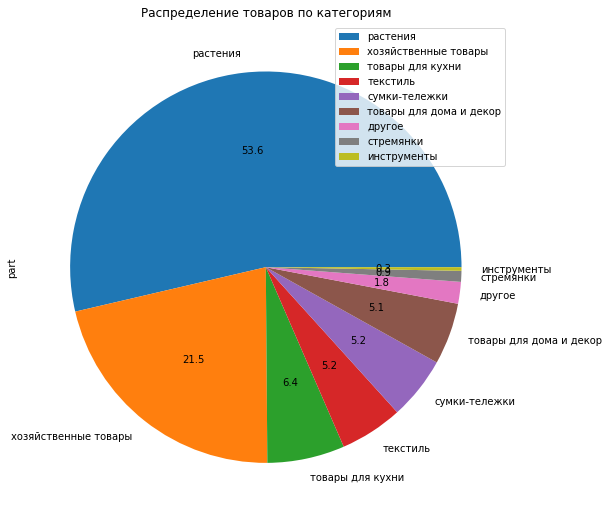

In [49]:
# Построим круговую диаграмму. 

df_category['part'].plot(title = 'Распределение товаров по категориям', kind='pie', autopct='%.1f',  figsize=(9,9))
plt.legend()
plt.show()
                  





- Лидеры в ассортименте категория растения ( более половины товаров 53.6%)
- Затем следуют хозяйственные товары (21.5%)
- Самые малочисленные категории стремянки(0.9) и инструменты(0.3) 

####  Анализ категорий по кол-ву продаж и выручке


#### Лидирующие категории по выручке

In [50]:
# лидирующие категории по выручке
df_cat_revenue=df_new.pivot_table(index=('category'),values=['revenue'],aggfunc='sum').sort_values('revenue', ascending=False)
df_cat_revenue

,revenue
category,
хозяйственные товары,1091714.0
сумки-тележки,610189.0
растения,527993.0
текстиль,363059.0
товары для кухни,179935.0
товары для дома и декор,156867.0
стремянки,93034.0
другое,67990.0
инструменты,3931.0


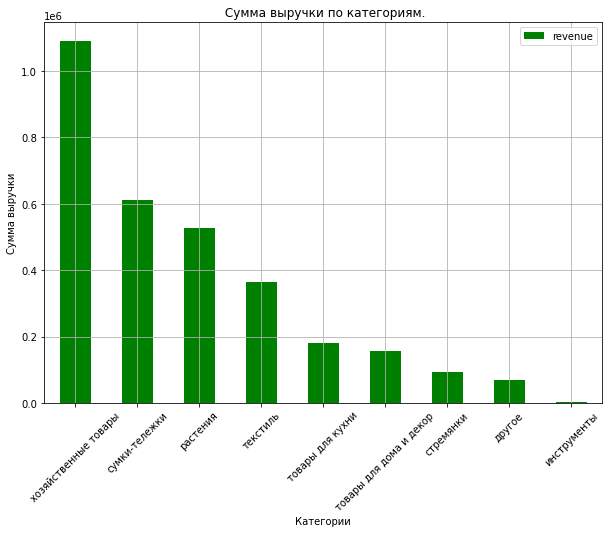

In [51]:
df_cat_revenue.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True,color='green')
                    
plt.title(' Сумма выручки по категориям.')
plt.xlabel('Категории')
plt.xticks(rotation = '45')
plt.ylabel('Cумма выручки')
plt.show()

Лидеры по выручке:

 1.хозяйственные товары(1091714)

 2.сумки-тележки(610189)

 3.растения (самая большая категория в ассортименте) дает менее половины(527993) от выручки хозяйственных товаров 


####  Лидирующие по кол-ву заказов  категории 

In [52]:
# лидирующие по кол-ву заказов  категории 

df_cat_orders=df_new.pivot_table(index=('category'),values=['order_id'],aggfunc='count').sort_values('order_id', ascending=False)
df_cat_orders

,order_id
category,
растения,2570
хозяйственные товары,1031
товары для кухни,308
текстиль,251
сумки-тележки,248
товары для дома и декор,242
другое,85
стремянки,42
инструменты,13


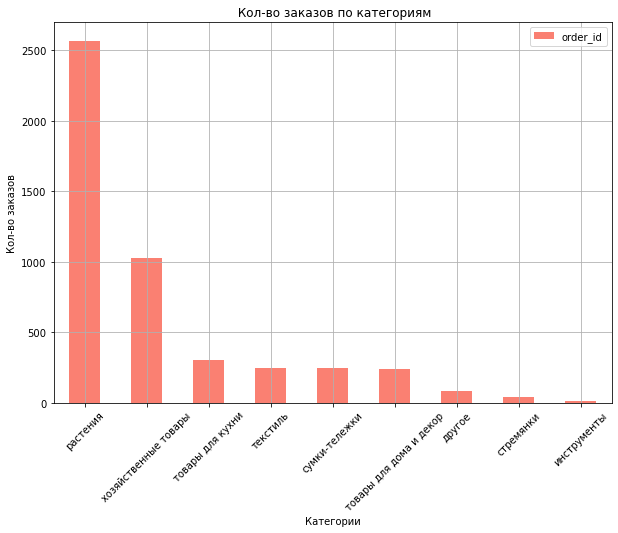

In [53]:
df_cat_orders.plot(kind='bar', y=['order_id'], figsize=(10,7), grid=True, color='salmon', 
                    )
plt.title(' Кол-во заказов по категориям')
plt.xlabel('Категории')
plt.xticks(rotation = '45')
plt.ylabel('Кол-во заказов')
plt.show()

С отрывом в 2.5 раза лидируют растения . Это еще раз демонструрует, что  имеется большое кол-во недорогих заказов 

####   Динамики выручки и заказов в  категориях  по месяцам 

In [54]:
# сгруппированная таблица категорий с выручкой и заказами  по месяцам 
df_cat_revenue_month= df_new.groupby(['category', 'month_year']).agg({'revenue':'sum','quantity':'count','order_id':'nunique',}).reset_index()
df_cat_revenue_month['revenue_per_order'] = (df_cat_revenue_month['revenue'] / df_cat_revenue_month['order_id']).round(1)
df_cat_revenue_month

,category,month_year,revenue,quantity,order_id,revenue_per_order
0,другое,2018-10,8762.0,15,12,730.2
1,другое,2018-11,17216.0,11,7,2459.4
2,другое,2018-12,10280.0,16,14,734.3
3,другое,2019-01,7115.0,4,4,1778.8
4,другое,2019-02,2187.0,4,4,546.8
...,...,...,...,...,...,...
106,хозяйственные товары,2019-06,65179.0,63,62,1051.3
107,хозяйственные товары,2019-07,85492.0,74,74,1155.3
108,хозяйственные товары,2019-08,59177.0,59,59,1003.0
109,хозяйственные товары,2019-09,57822.0,58,57,1014.4


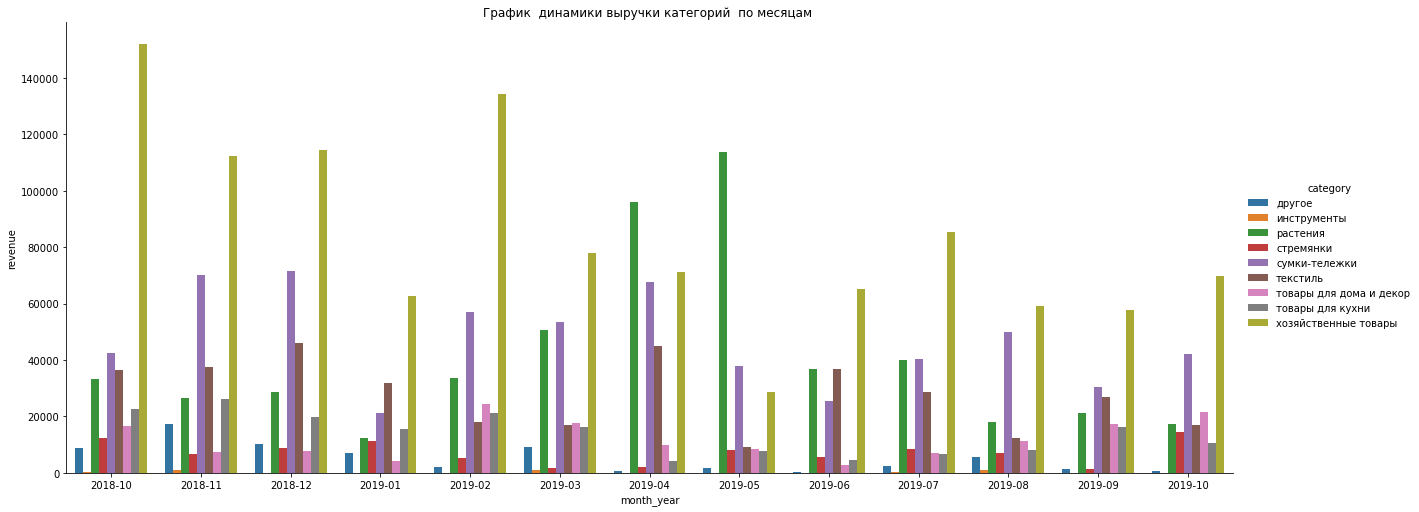

In [55]:
# график  динамики выручки категорий  по месяцам 
sns.catplot(x="month_year", y="revenue", hue="category", kind="bar", data=df_cat_revenue_month, height=7, aspect=2.5 )
plt.title('График  динамики выручки категорий  по месяцам ')
plt.show()

- Выручка товаров по категориям относительно равномерно распределена по времени в соответствии с общей выручкой .

- Некоторую "сезонность" можно проследить в категории растения( увеличение продаж  в весенние месяцы со спадом с июня), что традиционно совпадает с графиком садово-огородных работ

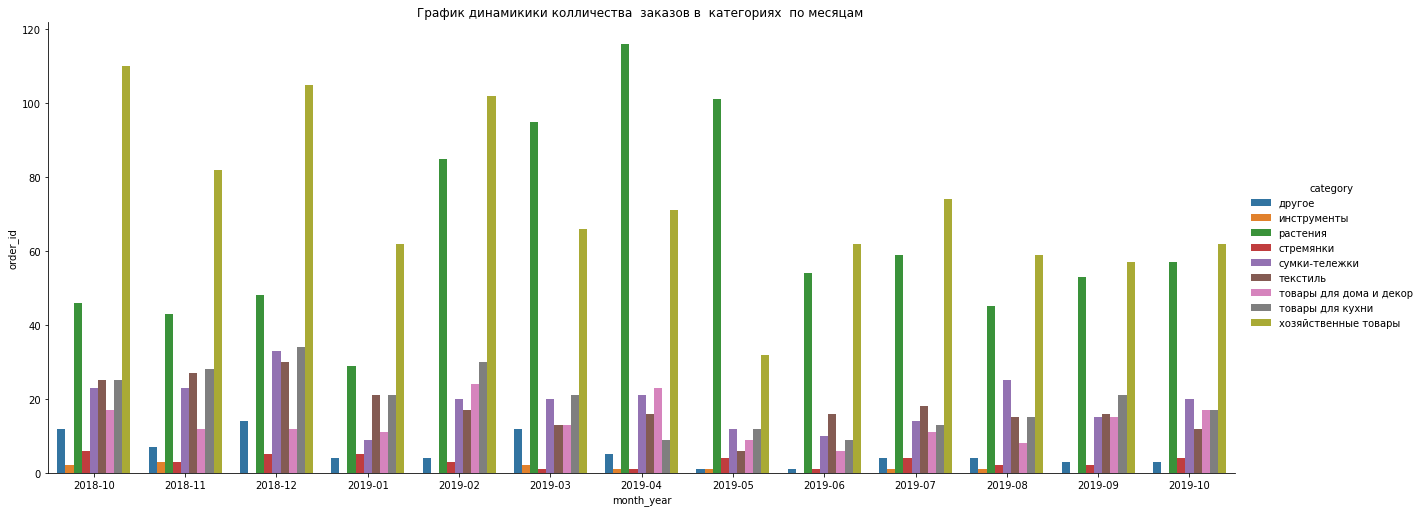

In [56]:
#  график динамикики колличества  заказов в  категориях  по месяцам 
sns.catplot(x="month_year", y="order_id", hue="category", kind="bar", data=df_cat_revenue_month, height=7, aspect=2.5)
plt.title('График динамикики колличества  заказов в  категориях  по месяцам ')
plt.show()

- Динамика кол-ва заказов товаров по категориям относительно равномерно распределена по времени 

- Некоторую "сезонность" можно проследить в категории растения( увеличение продаж с февраля и в весенние месяцы ), можно предположить что приобретаются семена и рассада

- Сумки-тележки показывают сезонность в кол-ве заказов в декабре и августе,совпадая с периодом планирования каникул-отпусков


In [57]:
#Cводная таблица  категорий товаров 
df_category_summary = df_new.pivot_table(index='category', values=['order_id','revenue','price','quantity'], 
                    aggfunc={'order_id':'count',
                             'revenue': 'sum', 
                             'price': 'mean', 
                             'quantity':'count',
                             }).round().sort_values(by = 'revenue', ascending = False)


# доля  выручки в категории от общей выручки   
df_category_summary['part_revenue'] = (df_cat_revenue['revenue'] / df_new['revenue'].sum()* 100).round(1)
# доля от общих продаж
df_category_summary['part_orders'] = (df_cat_orders['order_id'] /df_cat_orders['order_id'].sum()* 100).round(1)
# средний чек заказов revenue_per_order (разделим показатель revenue на заказы)
df_category_summary['revenue_per_order'] = (df_category_summary['revenue'] / df_category_summary['order_id']).round(1)
df_category_summary = df_category_summary.sort_values(by='revenue', ascending = False)

df_category_summary.columns = ['Кол-во заказов','Средняя цена товара','Кол-во товаров','Выручка','Доля от общей выручки','Доля от общих заказов','Средний чек']
df_category_summary


,Кол-во заказов,Средняя цена товара,Кол-во товаров,Выручка,Доля от общей выручки,Доля от общих заказов,Средний чек
category,,,,,,,
хозяйственные товары,1031,859.0,1031,1091714.0,35.3,21.5,1058.9
сумки-тележки,248,2441.0,248,610189.0,19.7,5.2,2460.4
растения,2570,149.0,2570,527993.0,17.1,53.7,205.4
текстиль,251,984.0,251,363059.0,11.7,5.2,1446.5
товары для кухни,308,383.0,308,179935.0,5.8,6.4,584.2
товары для дома и декор,242,441.0,242,156867.0,5.1,5.1,648.2
стремянки,42,2170.0,42,93034.0,3.0,0.9,2215.1
другое,85,492.0,85,67990.0,2.2,1.8,799.9
инструменты,13,197.0,13,3931.0,0.1,0.3,302.4


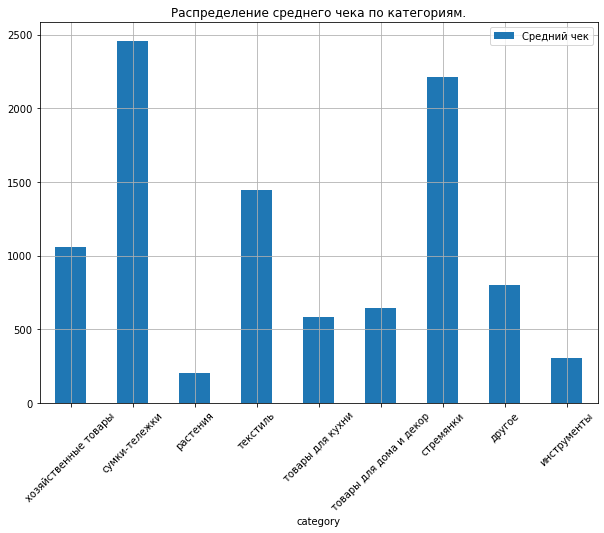

In [58]:
df_category_summary.plot(kind='bar', y=['Средний чек'], figsize=(10,7), grid=True)
plt.title('Распределение среднего чека по категориям.')
plt.xticks(rotation = '45')
plt.legend()
plt.show()

наибольший средний чек у категории сумки-тележки

#### Распределение товаров  по ценовому диапазону

Вновь вернемся к анализу товаров по цене

In [59]:
#распределение  товров по цене
df_category_summary['Средняя цена товара'].describe()


count       9.000000
mean      901.777778
std       844.018184
min       149.000000
25%       383.000000
50%       492.000000
75%       984.000000
max      2441.000000
Name: Средняя цена товара, dtype: float64

In [60]:
#Напишем функцию категоризации по цене и применим её
def price_group(price):
    if price < 150:
        return('дешевые')
    if price >=150 and price < 630:
        return('средняя цена')
    if price >630 :
        return('дорогие')
    else:
            return '...'



In [61]:
# добавим столбец с ценовой группой 
df_category_summary['Ценовая группа'] =df_category_summary['Средняя цена товара'].apply(price_group)

display(df_category_summary)

,Кол-во заказов,Средняя цена товара,Кол-во товаров,Выручка,Доля от общей выручки,Доля от общих заказов,Средний чек,Ценовая группа
category,,,,,,,,
хозяйственные товары,1031,859.0,1031,1091714.0,35.3,21.5,1058.9,дорогие
сумки-тележки,248,2441.0,248,610189.0,19.7,5.2,2460.4,дорогие
растения,2570,149.0,2570,527993.0,17.1,53.7,205.4,дешевые
текстиль,251,984.0,251,363059.0,11.7,5.2,1446.5,дорогие
товары для кухни,308,383.0,308,179935.0,5.8,6.4,584.2,средняя цена
товары для дома и декор,242,441.0,242,156867.0,5.1,5.1,648.2,средняя цена
стремянки,42,2170.0,42,93034.0,3.0,0.9,2215.1,дорогие
другое,85,492.0,85,67990.0,2.2,1.8,799.9,средняя цена
инструменты,13,197.0,13,3931.0,0.1,0.3,302.4,средняя цена


#### Распределение товаров по колличеству продаж 

In [62]:
df_category_summary[['Кол-во заказов']].describe()

,Кол-во заказов
count,9.000000
mean,532.222222
std,822.010307
min,13.000000
25%,85.000000
50%,248.000000
75%,308.000000
max,2570.000000


In [63]:
#Напишем функцию категоризации по КОЛЛИЧЕСТВУ ПРОДАЖ  и применим её
def order_group(Колличество):
    if Колличество <= 135:
        return('редко покупаемые')
    if Колличество >135 and Колличество < 533:
        return('средняя популярность')
    if Колличество >630 :
        return('часто продаваемые')
    else:
            return '...'


In [64]:
# добавим столбец с группой  по колличеству продаж 
df_category_summary['Группа по продажам'] = df_category_summary['Кол-во заказов'].apply(order_group)

display(df_category_summary.head(10))

,Кол-во заказов,Средняя цена товара,Кол-во товаров,Выручка,Доля от общей выручки,Доля от общих заказов,Средний чек,Ценовая группа,Группа по продажам
category,,,,,,,,,
хозяйственные товары,1031,859.0,1031,1091714.0,35.3,21.5,1058.9,дорогие,часто продаваемые
сумки-тележки,248,2441.0,248,610189.0,19.7,5.2,2460.4,дорогие,средняя популярность
растения,2570,149.0,2570,527993.0,17.1,53.7,205.4,дешевые,часто продаваемые
текстиль,251,984.0,251,363059.0,11.7,5.2,1446.5,дорогие,средняя популярность
товары для кухни,308,383.0,308,179935.0,5.8,6.4,584.2,средняя цена,средняя популярность
товары для дома и декор,242,441.0,242,156867.0,5.1,5.1,648.2,средняя цена,средняя популярность
стремянки,42,2170.0,42,93034.0,3.0,0.9,2215.1,дорогие,редко покупаемые
другое,85,492.0,85,67990.0,2.2,1.8,799.9,средняя цена,редко покупаемые
инструменты,13,197.0,13,3931.0,0.1,0.3,302.4,средняя цена,редко покупаемые


переведем индексы в столбец 

In [65]:
df_category_summary =df_category_summary.reset_index(level=0)

In [66]:
df_category_summary

,category,Кол-во заказов,Средняя цена товара,Кол-во товаров,Выручка,Доля от общей выручки,Доля от общих заказов,Средний чек,Ценовая группа,Группа по продажам
0,хозяйственные товары,1031,859.0,1031,1091714.0,35.3,21.5,1058.9,дорогие,часто продаваемые
1,сумки-тележки,248,2441.0,248,610189.0,19.7,5.2,2460.4,дорогие,средняя популярность
2,растения,2570,149.0,2570,527993.0,17.1,53.7,205.4,дешевые,часто продаваемые
3,текстиль,251,984.0,251,363059.0,11.7,5.2,1446.5,дорогие,средняя популярность
4,товары для кухни,308,383.0,308,179935.0,5.8,6.4,584.2,средняя цена,средняя популярность
5,товары для дома и декор,242,441.0,242,156867.0,5.1,5.1,648.2,средняя цена,средняя популярность
6,стремянки,42,2170.0,42,93034.0,3.0,0.9,2215.1,дорогие,редко покупаемые
7,другое,85,492.0,85,67990.0,2.2,1.8,799.9,средняя цена,редко покупаемые
8,инструменты,13,197.0,13,3931.0,0.1,0.3,302.4,средняя цена,редко покупаемые


##  Формулировка и проверка гипотез

Для формулирования гипотез проанализируем  объединенную таблицу  с выделенными группами по категориям товаров.




###  Гипотеза 1

Для формулирования первой гипотезы возьмем товары средней ценовой группы и средней популярности.

В нашем случае, это категории товаров: товары для кухни( 6.4% от ассортимента магазина ) и товары для дома и декор( 5.1% от ассортимента магазина)

Значения средних чеков между категориями 'товары для кухни' и 'товары для дома и декор'(относящимися к одной ценовой группе и группе по кол-ву продаж) в расчетах по месяцам  равны  

H0: Средние значения чеков по месяцам  между категориями статистически равны


H1: Средние значения чеков по месяцам  между категориями статистически отличаются

In [67]:
results = st.ttest_ind(
   df_cat_revenue_month[(df_cat_revenue_month.category == "товары для кухни") & (df_cat_revenue_month.revenue_per_order)]['revenue_per_order'], 
   df_cat_revenue_month[(df_cat_revenue_month.category == "товары для дома и декор") & (df_cat_revenue_month.revenue_per_order)]['revenue_per_order'])
alpha=.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.07420419201956534
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

Сравним значения выручки между категориями 'сумки-тележки' и 'текстиль'(относящимися к одной ценовой группе и группе по кол-ву продаж, а именно дорогие и средние по продажам)
Эти категории товаров составляют равное кол-во в ассортименте магазина по 5.2% 

H0: Средние значения выручки между категориями статистически равны
    

H1: Средние значения выручки между категориями статистически отличаются

In [68]:
results = st.ttest_ind(
   df_new[(df_new.category == "текстиль") & (df_new.revenue)]['revenue'], 
    df_new[(df_new.category == "сумки-тележки") & (df_new.revenue)]['revenue'])
alpha=.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 1.869436633646832e-09
Отвергаем нулевую гипотезу


Выводы пункта

 Обе гипотезы двусторонние. Нулевая формулировалась исходя из равенства , значит альтернативная гипотеза обратна ей

Для оценки использован критерий значение p-value - вероятность совпадения. Значение критического уровня статистической значимости (альфа) принят равным 5%.
Если pvalue < alpha:есть основания отвергнуть нулевую гипотезу если больше, то отвергнуть нулевую гипотезу не получается

In [69]:
df_new.to_csv('df_new.csv', index=False)

## Вывод  

Проведен анализ данных  о продажах интернет-магазина товаров для дома за период с 2018-10-01 по 2019-10-31.

  1. В рамках анализа торгового ассортимента :

  - выделены следующие категории  товаров: растения, хозяйственные товары, товары для дома и декор,товары для кухни, текстиль, сумки-тележки, стремянки, инструменты.

 В ассортименте  магазина в большей степени представлена категория растения ( более половины товаров 53.6%)
Затем следуют хозяйственные товары (21.5%)
Самые малочисленные категории стремянки(0.9) и инструменты(0.3)

- Лидеры по выручке:
  1.хозяйственные товары(1091714)
  2.сумки-тележки (610189)
  3.растения (самая большая категория в ассортименте) дает менее половины(527993) от выручки хозяйственных товаров

 - В кол-ве заказов лидирует категория растения

- выручка  от 9.0(min)до 24370(max), в среднем составляет чуть более 646р., причем 50% показывают лишь 188, что говорит о 
преимущественной продаже более дешевых товаров

 2. Проведен временной анализ
 
 - Динамика выручки и заказов в категориях по месяцам
 
 Наибольшая выручка продемонстрирована в первый работы магазина в октябре 2018 (составила 325002)
Динамика кол-ва заказов товаров по категориям и выручка товаров по категориям относительно равномерно распределена по времени в соответствии с общей выручкой

 - Ежемесячная выручка уменьшается, причем последние полгода её значение составляет около 60% выручки первого месяца исследуемого периода.
 
- Наибольшее кол-во заказов в начале недели
- Время  максимальной  покупательской активности середина дня  с 11 до 17 часов

- Сезонность:
Некоторую "сезонность"выручки  и количества заказов можно проследить в категории растения, что совпадает с графиком садово-огородных работ.
 Сумки-тележки показывают сезонность в кол-ве заказов в декабре и августе, совпадая с периодом планирования каникул(отпусков)

 3. Проведено распределение товаров  по ценовому диапазону(дешевые,средней цены и дорогие) и группам продаж (часто продаваемые товары, товары средней популярности и редко продаваемые) 
Выявлен основной  ассортимент это растения и хозяйственные товары , остальной ассортимент можно считать дополнительным.

 4. Проверены статистические гипотезы

##  Рекомендации 


Рекомендации

 - Менеджменту магазина стоит обратить внимание на корректность    внесения  и выгрузки данных 
    
отделу продаж:

1.Улучшить средний чек основного ассортимента товаров Для этого необходимо, предлагать сопутствующие товары со скидкой.Работать с ассортиментом и его сортировкой, предлагая позиции дороже среднего чека. Проводить акции и спецпредложения.

2.Обратить внимание на потенциально-прибыльные категории более дорогих товаров,расширив ассортимент Дешёвые товары с низкой ценой не могут генерировать магазину выручку сопоставимую с той, какую дают товары с высокой ценой.

Отделу закупки:
    
стоит увеличивать ассортимент тех товаров, которые хорошо продавлись за год,  уменьшать ассортимент товаров, годовая выручка которых показала неудовлетворительные результаты по сравнению со средними показателями. Это поможет эффективнее распоряжаться бюджетом на товары 

Отделу маркетинга:

рекомендуем сделать популярные товары  заметнее на сайте, добавить в рекомендуемые. Делать рассылки с акциями и спецпредложениями особенно в часы максимальной покупательской активности

презентация

https://disk.yandex.ru/i/qRjuj63BvFviyQ

дашборд

https://public.tableau.com/views/E-commers/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link